# Linear Regression

## Introduction

Our Learning Algorithm should be able to create a hypothesis function $h$ from the data in the training set.

In Univariate Linear Regression, $h$ is of the form $h_{\Theta}(x) = \Theta_0 + \Theta_1*x_1 $.

We want to minimize the cost function $J(\Theta) = \frac{1}{2m}\sum_{i=1}^m (h_{\Theta}(x^i) - y^i)^2 $.

*OBS: The $\frac{1}{m}$ is used to average the squared error over the number of components. The extra $\frac{1}{2}$ is optional, but is often used by authors to cancel out the 2 when taking the derivative.*

Some vocabulary:

- $\Theta_i$ : parameters (weights)
- $x_i$ :  input variables (features)
- $y_i$ : output values (target)
- $m$ : number of training examples

## How to determine $\Theta$ ?

### Gradient Descent

- Start with some $\Theta_i$
- Keep changin $\Theta_i$ to reduce $J(\Theta)$ until we hopefully end up at a minimum

#### The algorithm
$\Theta_j = \Theta_j - \alpha\frac{\delta}{\delta \Theta_j}J(\Theta)$

*OBS: the update should be simultaneous for all values of j*

#### Learning rate
$\alpha$ is called the **learning rate**

- if $\alpha$ is too small, the gradient descent can be too **low**
- if $\alpha$ is too large, gradient descent can overshoot the minimum. It may **fail to converge**, or even diverge.

*OBS: Gradient descent can converge to a local minimum, even with the learning rate $\alpha$ fixed.*

#### Replacing the cost function
Widrow-Hoff learning Rule:

$\Theta_j = \Theta_j - \alpha(h_{\Theta}(x^i) - y^i)*x^i_j$

Some observations
- The magnitude of the update is proportional to the error rate ($y^i-h_{\Theta}(x^i)$): that means that if the prediction is very close to the real value, there's little need to chance the parameters.

#### Batch Gradient Descent
"Batch": Each step of gradient descent uses **all the training examples** on all steps.

$\Theta_0 = \Theta_0 - \alpha\frac{1}{m}\sum^m_{i=1}(h_{\Theta}(x^i)-y_i)$

$\Theta_1 = \Theta_1 - \alpha\frac{1}{m}\sum^m_{i=1}(h_{\Theta}(x^i)-y_i)*x^i_1$

*OBS: Batch Gradient Descent has to scan through the entire training set begore taking a single step (costly operation if m is large)*

#### Stochastic
Each step of gradient descent uses **one training example.**

$\Theta_0 = \Theta_0 - \alpha(h_{\Theta}(x^i)-y_i)$

$\Theta_1 = \Theta_1 - \alpha(h_{\Theta}(x^i)-y_i)*x^i_1$

*OBS: Contrary to batch gradient descent, stochastic gradient descent can start making progress right away, and
continues to make progress with each example it looks at. Often, stochastic gradient descent gets $\Theta$ “close” to the minimum much **faster** than batch gradient descent*

*OBS2: When the training set is large, stochastic gradient descent is often preferred over batch gradient descent.*

#### Mini-batch Gradient Descent
Each step of gradient descent uses **b training examples**

## Interpreting the Result
Ex: LR to predict the sales according to how much was spent on TV ads. We found the following model:

$\hat{y} = 7.03 + 0.0475*x$

That means that for each $1000 spent in TV ads, we sell 47.5 aditional units.

# Multivariate Linear Regression

## Gradient Descent

$\Theta_j = \Theta_j - \alpha\frac{1}{m}\sum^m_{i=1}(h_{\Theta}(x^i)-y_i)*x^i_j$

### Batch Gradient Descent

`for i in range(nb_epochs):
     params_grad = evaluate_gradient(loss_function,data,params)
     params = params - learning_rate * params_grad`
 
#### Epoch
One epoch is one **complete run through all of the training data**

#### Batch Size
Total number of **training examples present in a single batch**

#### Iterations
The number of batches needed to complete one epoch

Ex: We have **10,000 training examples** -> divide into **batches of 16** -> 10,000/16 = **625 interations** for one epoch

### Stochastic Gradient Descent
`for i in range(nb_epochs):
     np.random.shuffle(data)
     for example in data:
         params_grad = evaluate_gradient(loss_function,example,params)
         params = params - learning_rate * params_grad`
         
### Mini-batch Gradient Descent
`for i in range(nb_epochs):
     np.random.shuffle(data)
     for batch in get_batches(data,batch_size=16):
         params_grad = evaluate_gradient(loss_function,batch,params)
         params = params - learning_rate * params_grad`
         
Interesting gradient descent optimization algorithms: https://ruder.io/optimizing-gradient-descent/

RAdam: https://medium.com/@lessw/new-state-of-the-art-ai-optimizer-rectified-adam-radam-5d854730807b

## Feature Scaling

Make sure features are on similar scale, by getting every feature into approximately a $−1 \leq x_i \leq 1$ range.

Mean normalization: eplace $x_i$ with $x_i - \mu$ to make features have approximately zero mean (do not apply to $x_0 = 1$).

## Learning Rate

For sufficiently small $\alpha$, $J(\Theta)$ should decrease on every iteration. But if $\alpha$ is too small, gradient descent can be slow to converge.

## Features and Polynomial Regression

## Normal Equation
Method to solve $\Theta$ analytically

$\Theta = (X^TX)^{-1}X^T*y$

### What if  $X^TX)$ is noninvertible?
Some causes

* Redundant features: where two features are very closely related (i.e. they are linearly dependent).
* Too many features (e.g. $m \leq n$). In this case, delete some features or use “regularization”.

### Gradient Descent x Normal Equation

|Gradient Descent                    | Normal Equation                      |
|------------------------------------|--------------------------------------|
| Need to choose $\alpha$ :(         |Do not need to choose $\alpha$ :)     |
| Needs many interactions :(         |Don’t need to iterate :)              |
| Works well even when n is large :) |Need to compute inverse -> $O(n^3)$ :(|
|                                    |Slow if n is large :(                 |

*OBS: n = number of features*

# Our Dataset
Source: https://www.kaggle.com/harlfoxem/housesalesprediction

"This dataset contains house sale prices for King County, which includes Seattle."

Import libraries

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Let's take a look at the dataset

In [3]:
df = pd.read_csv('kc_house_data.csv')
df = df.drop(["id", "date"], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Correlation matrix

Each cell on the table show the correlation between two variables.

https://towardsdatascience.com/let-us-understand-the-correlation-matrix-and-covariance-matrix-d42e6b643c22

### Correlation x Covariance
Both terms measure the relationship and dependency between two variables.

#### Covariance
Indicates the **direction** of the relationship. Covariance values aren't standardized.

$cov(x,y) = E[(x-\mu_x)(y-\mu_y)]=E[xy]-E[x]E[y]=E[xy]-\mu_x\mu_y$

- Covariance values can range from negative infinity to positive infinity.

- A covariance equal to 1 means that there is a perfect linear relationship between the two variables.

- Zero covariance **does not** imply independence.

- The magnitude of the covariance is not easy to interpret because it is not normalized and hence depends on the magnitudes of the variables.

*OBS:* $cov(y,y)=E[y^2]-E[y]^2=var(y)=s^2=\frac{\sum_{i=1}^n(x_i-\overline{x})^2}{n-1}$, *where s is the sampled variance*

#### Correlation
Measures the **strenght and direction** of the relationship. Correlation values are standardized. 

$corr(x,y) = \frac{cov(x,y)}{s_xs_y} = \frac{cov(x,y)}{\sigma_x\sigma_y}$

- Correlation value can vary from -1 to +1.

- The sign indicates whether the correlation is positive (both variables increase in the same direction) or not.

- $corr(x,x) = 1$

#### When to use?
In Principal Component Analysis, we should use the **covariance matrix** when the variables are on **similar scale** and the **correlation matrix** when the **scales are different**.


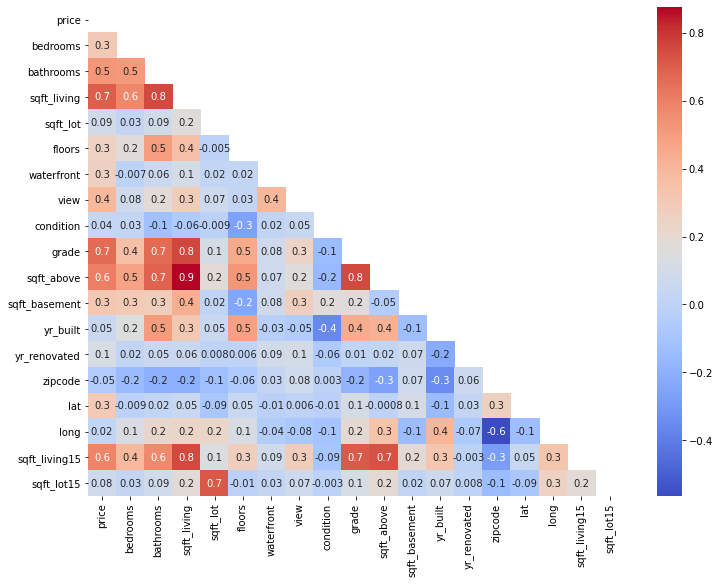

In [79]:
plt.figure(figsize=(12, 9))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True,fmt='.1g', cmap= 'coolwarm', mask=matrix)

## Simple Linear Regression

We'll first do a simple linear regression, using **sqft_living** as the feature.

In [80]:
dataset = df[["sqft_living", "price"]]
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

Splitting the dataset into the Training set and Test set

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

Fitting Simple Linear Regression to the Training set

In [82]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the Test set results

In [83]:
y_pred = regressor.predict(X_test)

Visualising the Training set results

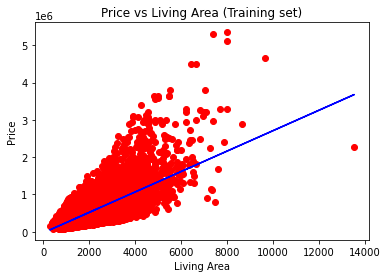

In [84]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Price vs Living Area (Training set)')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

Visualising the Test set results

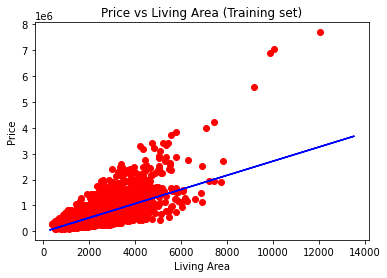

In [85]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Price vs Living Area (Training set)')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

In [86]:
print("Root Mean Squared Error: " + str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print("Score: "+ str(regressor.score(X_test,y_test))) #R^2

Root Mean Squared Error: 268643.1133198214
Score: 0.5000063123558641


## Multiple Linear Regression

### Removing correlated features

In [106]:
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
df = df.drop(correlated_features,axis=1)

### Recursive Feature Elimination with Cross-Validation
https://towardsdatascience.com/feature-selection-in-python-recursive-feature-elimination-19f1c39b8d15

It is a backward selection of preditors. We begin with the whole set of features, we define their importance and the least important feature is removed. The process is repeated until a certain stop condition.

In [53]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
X = df.drop('price', axis=1)
y = df['price']
rfc = LinearRegression()
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10))
rfecv.fit(X, y)

C:\Users\pypas\anaconda3\envs\ML\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                 normalize=False),
      min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [54]:
print('Optimal number of features: {}'.format(rfecv.n_features_))

Optimal number of features: 17


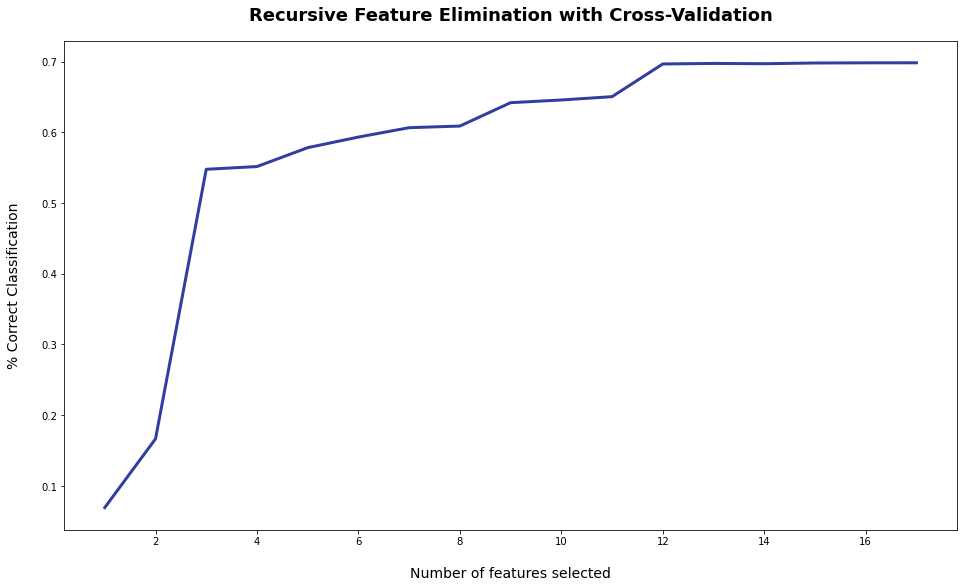

In [55]:
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)

plt.show()

### Evaluating the model

In [5]:
dataset = df[['sqft_living','grade', 'sqft_above', 'sqft_living15','bathrooms','view', 'sqft_basement','lat','waterfront','yr_built','bedrooms']]

X = dataset.iloc[:, :-1].values
y = df.price.values

Splitting the dataset into the Training set and Test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

Fitting Simple Linear Regression to the Training set

In [206]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predicting the Test set results

In [207]:
y_pred = regressor.predict(X_test)

RMSE and Score

Score(R^2): A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model.

In [208]:
from sklearn import metrics
print("Root Mean Squared Error: " + str(np.sqrt(metrics.mean_squared_error(y_test,y_pred))))
print("Score: "+ str(regressor.score(X_test,y_test))) #R^2

Root Mean Squared Error: 202228.2472065237
Score: 0.6838061780203321


### XGBoost
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework.
https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d

#### Boosting
Src: https://www.youtube.com/watch?v=kho6oANGu_A

Let's say we want to create an algorithm to classify an image as a cat or as a dog. We discover the following rules:

1. The image has pointy ears: it's a cat!

2. The image has cat shaped eyes: it's a cat!

3. The image has bigger limbs: it's a dog!

4. The image has sharpened claws: it's a cat!

5. The image has a wider mouth structure: it's a dog!

If we apply these rules separatedly, the prediction won't give good results. Each rule is called a **weak learner** because they're not strong enough to classify the image. 

One idea: get the predictions by each of the rules, and use the majority vote to determine if it is a dog or a cat.

**Boosting** is an ensemble learning technique that uses ML algorithms to combine weak learners to form strong learners, in order to increase the accuracy of the model. 

In [7]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train)

In [9]:
y_pred = xgb.predict(X_test)

In [11]:
from sklearn import metrics
print(f'Mean Squared Error: {metrics.mean_squared_error(y_pred,y_test)}')
print(f'Mean Absolute Error: {metrics.mean_absolute_error(y_pred,y_test)}')
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(y_pred,y_test))}')

Mean Squared Error: 20702336753.243935
Mean Absolute Error: 83023.30575916609
Root Mean Squared Error: 143883.0662491036
